In [1]:
#----------------------------------
#Importing Libraries
#----------------------------------
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from basic_functions import read_csv, get_outliers, column_name_replace_space,constrain_dataset,is_null
from missing_value_functions import predict_income, fill_income, fill_fertility, get_share_cols

In [2]:
#----------------------------------
#Load Datasets 
#----------------------------------
df_unpaid_care_work = read_csv('data/1-female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv')
df_unpaid_care_work_2 = read_csv('data/4-female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv')
df_maternal_mortality = read_csv('data/5-maternal-mortality.csv')
df_income = read_csv('data/2-share-of-women-in-top-income-groups.csv')
df_gender_wage = read_csv('data/6-gender-gap-in-average-wages-ilo.csv')

## Extra Datasets
df_woman_can_get_same_jobs = read_csv('data\women-can-take-the-same-jobs-as-men.csv')
df_fertility = read_csv('data/fertility-and-female-labor-force-participation.csv')

# Hdi Dataset
df_hdi= read_csv('data\human-development-index-(hdi)-by-country-2024.csv')


In [3]:
# It seems two datasets are the same 
# Because there is one null value code returns false
(df_unpaid_care_work_2 == df_unpaid_care_work).all()

Entity                                                                     True
Code                                                                      False
Year                                                                       True
Female to male ratio of time devoted to unpaid care work (OECD (2014))     True
dtype: bool

In [4]:
del df_unpaid_care_work_2

In [5]:
# Changing column names for readability
df_gender_wage.columns = column_name_replace_space(df_gender_wage.columns)
df_woman_can_get_same_jobs = df_woman_can_get_same_jobs.rename(columns={
    "A woman can get a job in the same way as a man (1=yes; 0=no)": "a_woman_can_get_a_job_in_the_same_way"})
df_fertility =df_fertility.rename(
    columns={
        'Labor force participation rate, female (% of female population ages 15+) (national estimate)':	'Labor_force_participation_rate',
        'Fertility rate - Sex: all - Age: all - Variant: estimates':'Fertility_rate',
        'Population (historical estimates)':'Population'
    })
df_unpaid_care_work = df_unpaid_care_work.rename(columns={"Female to male ratio of time devoted to unpaid care work (OECD (2014))": "f_to_m_unpaid_care_work_ratio"})
df_income = df_income.rename(columns=
    {
"Share of women in top 0.25%": "share_of_women_top_0.25%",   
"Share of women in top 0.5%" : "share_of_women_top_0.5%",      
"Share of women in top 0.1%" : "share_of_women_top_0.1%",    
"Share of women in top 1%"   : "share_of_women_top_1%",       
"Share of women in top 10%"  : "share_of_women_top_10%",      
"Share of women in top 5%"   : "share_of_women_top_5%"})

## Constrain Dataset

- HDI Rank Very High-High, Between 1980 - Today

In [6]:
selected_countries = df_hdi[(df_hdi['HdiTier']=='Very High') | (df_hdi['HdiTier']=='High')]['country']

In [7]:
# Getting the constrained dataset
df_gender_wage = constrain_dataset(df_gender_wage,selected_countries)
df_woman_can_get_same_jobs =constrain_dataset(df_woman_can_get_same_jobs,selected_countries)
df_fertility = constrain_dataset(df_fertility, selected_countries).drop(columns=['Continent'],axis=1)
df_income =constrain_dataset(df_income,selected_countries)
df_unpaid_care_work = constrain_dataset(df_unpaid_care_work,selected_countries)


### 1. Gender Gap Wage 
- The gender wage gap is defined as the difference between median earnings of men and women relative to median earnings of men.
- If it is positive it means women earn less money than men for comparable work


In [8]:
df_gender_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               326 non-null    object 
 1   Code                 326 non-null    object 
 2   Year                 326 non-null    int64  
 3   Gender_wage_gap_(%)  326 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.3+ KB


In [9]:
df_gender_wage.head()

,Entity,Code,Year,Gender_wage_gap_(%)
0,Argentina,ARG,1986,15.79
1,Argentina,ARG,1987,12.50
2,Argentina,ARG,1988,11.31
3,Argentina,ARG,1991,6.71
4,Argentina,ARG,1992,8.33


In [10]:
# Checking null values
is_null(df_gender_wage)

Entity                 0
Code                   0
Year                   0
Gender_wage_gap_(%)    0
dtype: int64

In [11]:
# Checking outliers
# No outliers
get_outliers(df_gender_wage,'Gender_wage_gap_(%)')

Series([], Name: Gender_wage_gap_(%), dtype: float64)

In [12]:
# Year:1981-2016
# Mostly women paid 5%-17% less money than men
# Maximum wage gap is 35% with disadventeging women
# There is also at least on data that men less paid than women with -21%
df_gender_wage.describe()

,Year,Gender_wage_gap_(%)
count,326.000000,326.000000
mean,2005.466258,11.964080
std,7.969003,9.605632
min,1981.000000,-21.570000
25%,2001.000000,5.290000
50%,2007.000000,11.750000
75%,2012.000000,17.687500
max,2016.000000,35.750000


C:\Users\HP\AppData\Local\Temp\ipykernel_12244\2377079610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=df_gender_wage, x='Gender_wage_gap_(%)',orient='h',palette='dark')


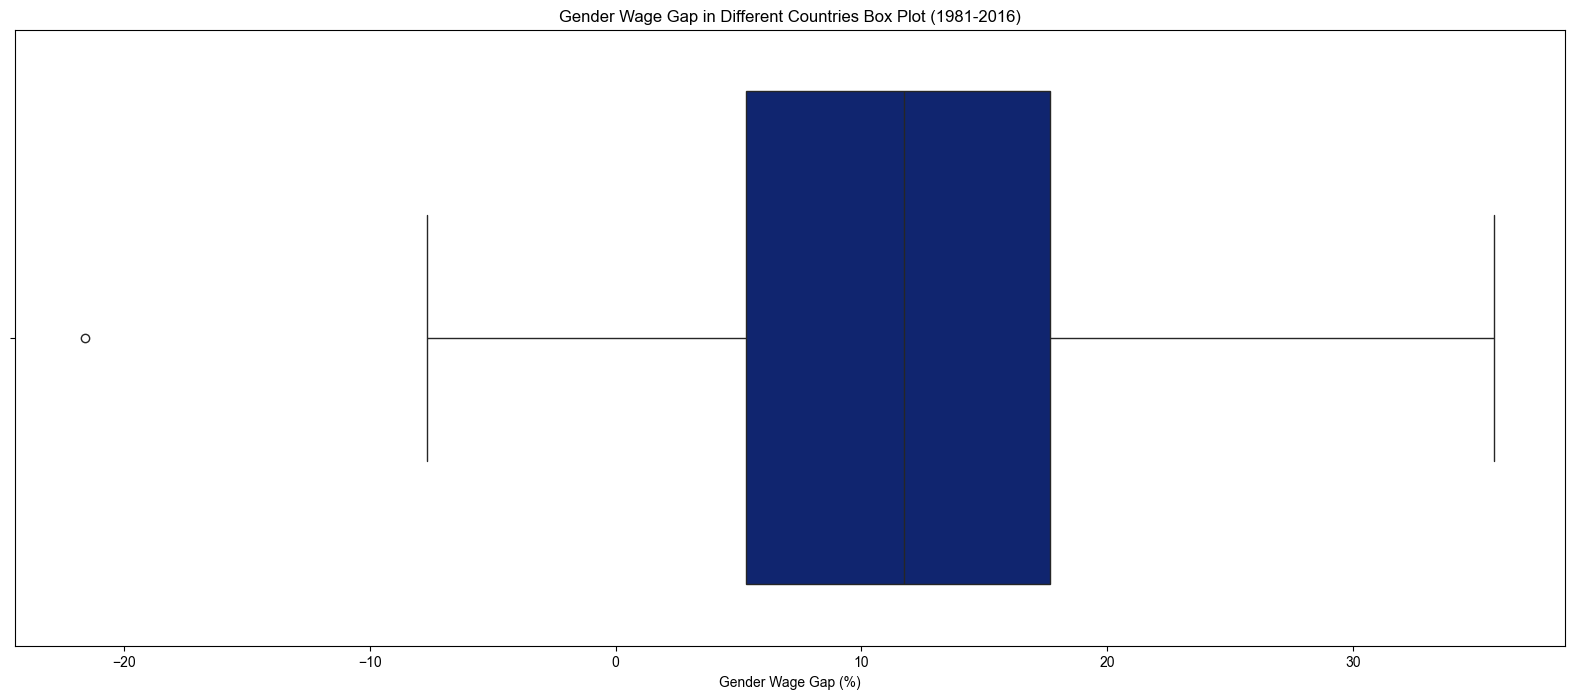

In [13]:
# Most of the data has 5-15 percent gap
# Mostly there is gender wage gap disadventeging women

plt.figure(figsize=(20,8))
plt.title('Gender Wage Gap in Different Countries Box Plot (1981-2016)')
plt.xlabel('Gender Wage Gap (%)')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_gender_wage, x='Gender_wage_gap_(%)',orient='h',palette='dark')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\3996330953.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gender_wage.sort_values(by ='Gender_wage_gap_(%)'),


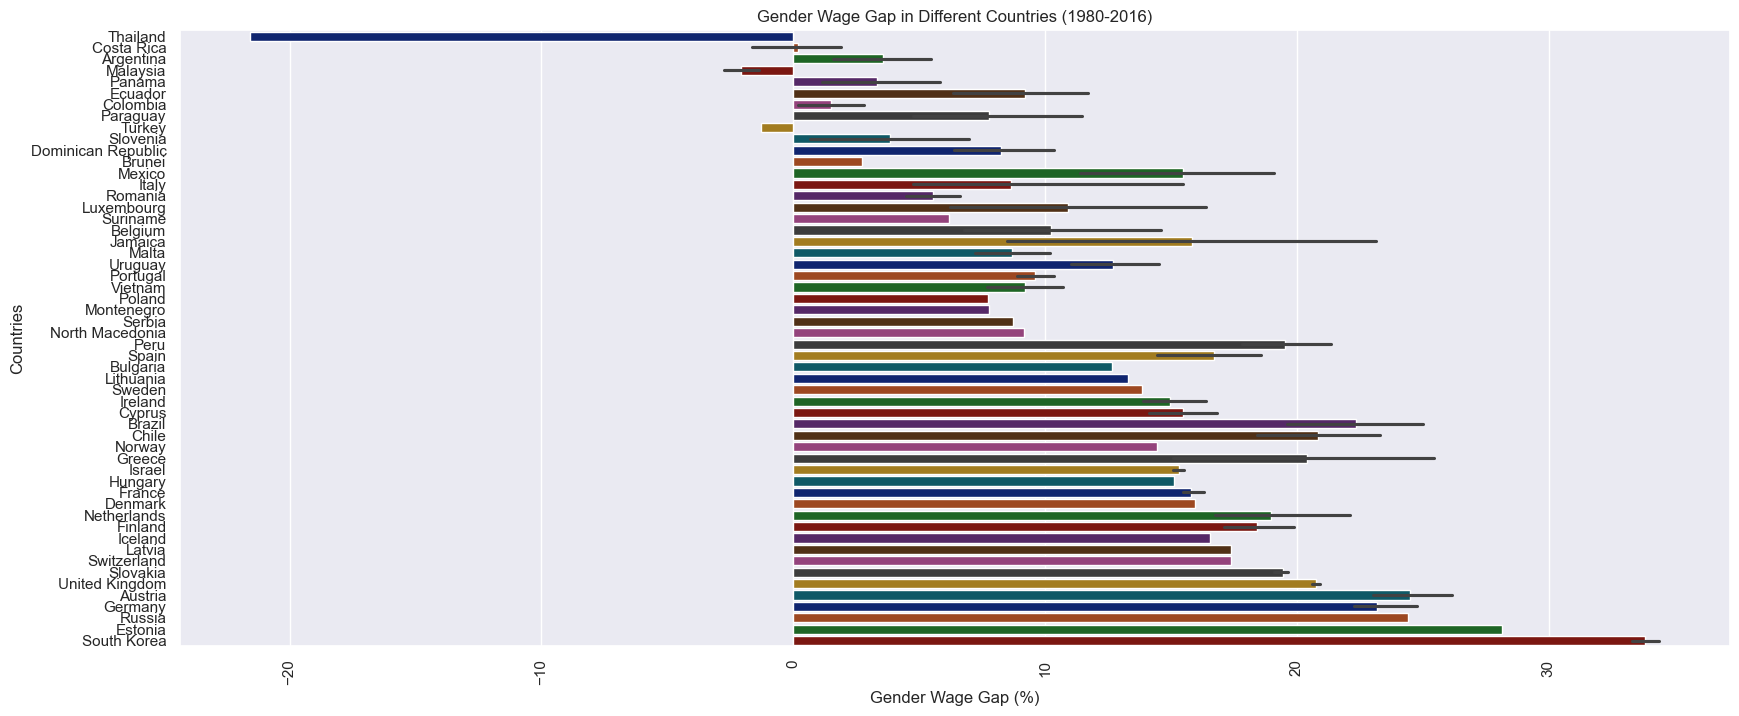

In [14]:
# Almost all countries in the data has positive gender wage gap disadventeging women
# Thailand is very different from other countries by about -25% gender wage gap
# South Korea has the biggest gender wage gap about 37%
plt.figure(figsize=(20,8))
plt.title('Gender Wage Gap in Different Countries (1980-2016)')
plt.xlabel('Gender Wage Gap (%)')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_gender_wage.sort_values(by ='Gender_wage_gap_(%)'),
             y="Entity",
            x="Gender_wage_gap_(%)",
            palette='dark'
            ,orient='h'
            
)
plt.show()

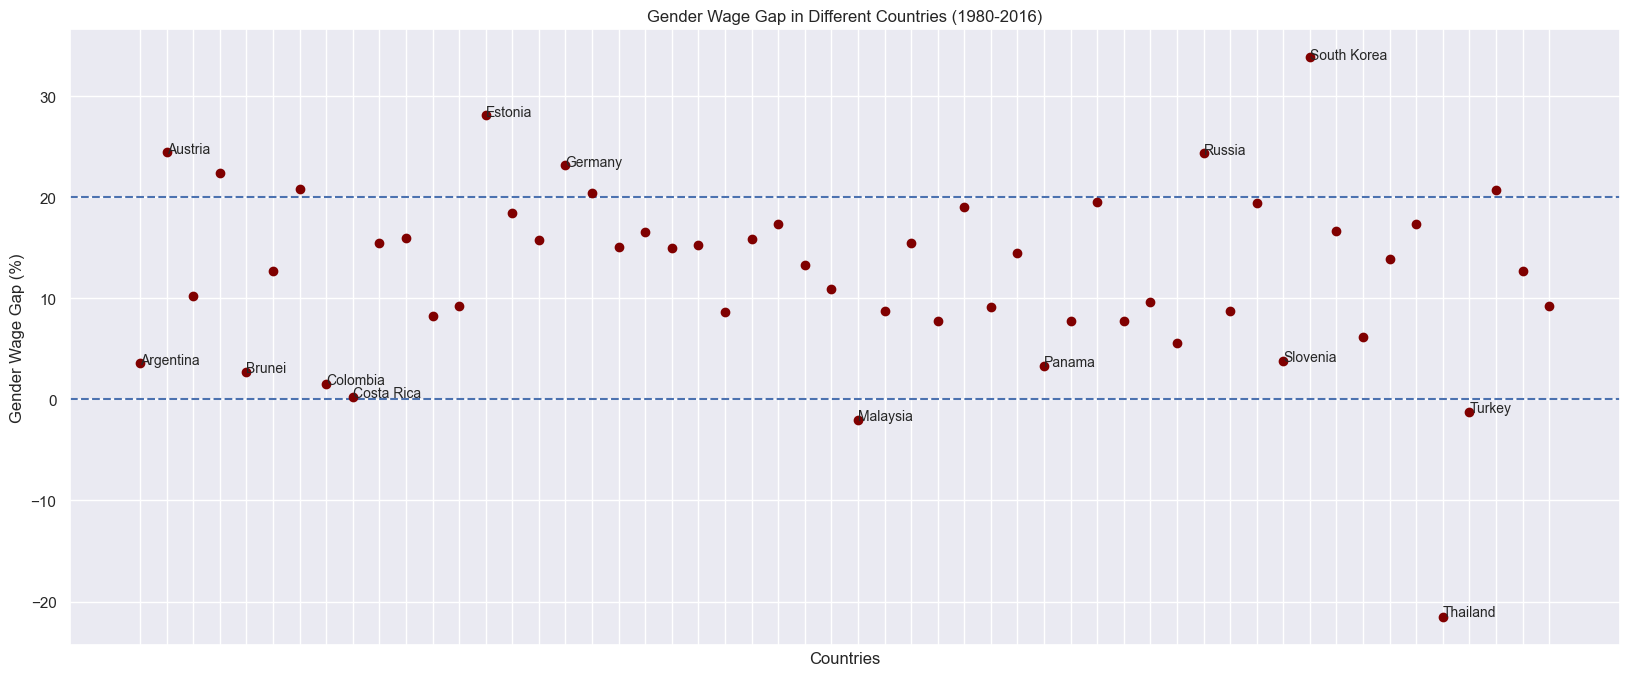

In [15]:
# Turkey,Malaysia,Costa Rica have almost equal gender wage gap
# South Korea, Estonia, Austria has the most gender wage gap disadventiging women
# Thailand has the most gender wage gap disadventiging men
plt.figure(figsize=(20,8))
plt.title('Gender Wage Gap in Different Countries (1980-2016)')
plt.ylabel('Gender Wage Gap (%)')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=0, color='b', linestyle='--')
plt.axhline(y=20, color='b', linestyle='--')

for i in range(len(df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby('Entity').mean())):
    x = df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].name
    y = df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].values[0]
    plt.plot(x, y, "o", color="maroon")
    if df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].values[0] >= 23 or \
    df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].values[0] <= 5:
        plt.text(x, y * (1 - 0.005), df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].name, fontsize=10)
plt.show()

<Axes: xlabel='Year', ylabel='Gender_wage_gap_(%)'>

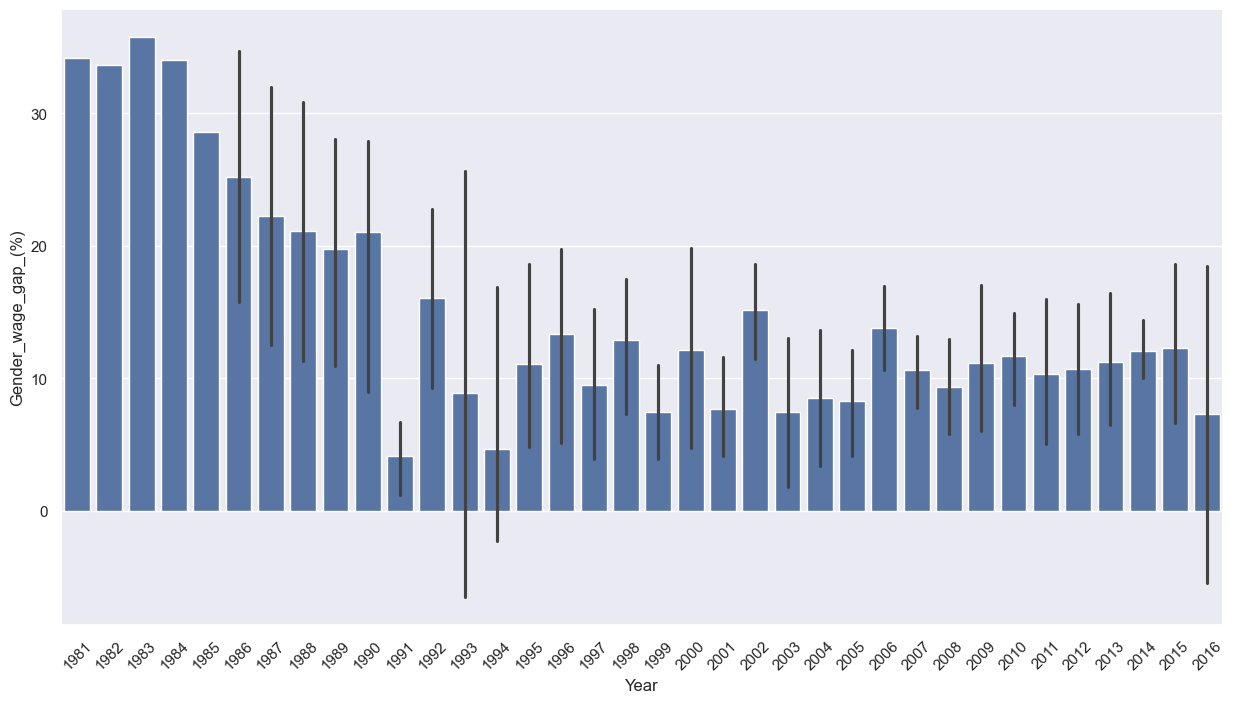

In [16]:
# We can see again in 1990 there is a sharp decrease in gender wage gap
# After 1990 it has up and downs but it hasn't reach the 1990 gender wage gap again
# After 1990 it is below 20 percent generally
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=45)
sns.barplot(df_gender_wage, x="Year", y="Gender_wage_gap_(%)")



### 2. Share of Income
- Percentage of individuals falling into top income brackets that are women

In [17]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    148 non-null    object 
 1   Code                      148 non-null    object 
 2   Year                      148 non-null    int64  
 3   share_of_women_top_0.1%   111 non-null    float64
 4   share_of_women_top_0.25%  17 non-null     float64
 5   share_of_women_top_0.5%   62 non-null     float64
 6   share_of_women_top_1%     147 non-null    float64
 7   share_of_women_top_10%    148 non-null    float64
 8   share_of_women_top_5%     148 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 10.5+ KB


In [18]:
df_income.head()

,Entity,Code,Year,share_of_women_top_0.1%,share_of_women_top_0.25%,share_of_women_top_0.5%,share_of_women_top_1%,share_of_women_top_10%,share_of_women_top_5%
0,Australia,AUS,2000,14.2,NaN,NaN,18.3,24.9,21.1
1,Australia,AUS,2001,13.2,NaN,NaN,18.4,25.1,21.4
2,Australia,AUS,2002,13.5,NaN,NaN,18.8,25.1,21.5
3,Australia,AUS,2003,14.4,NaN,NaN,19.1,25.1,21.6
4,Australia,AUS,2004,15.2,NaN,NaN,19.6,25.5,22.2


In [19]:
is_null(df_income)

share_of_women_top_0.25%    131
share_of_women_top_0.5%      86
share_of_women_top_0.1%      37
share_of_women_top_1%         1
Entity                        0
Code                          0
Year                          0
share_of_women_top_10%        0
share_of_women_top_5%         0
dtype: int64

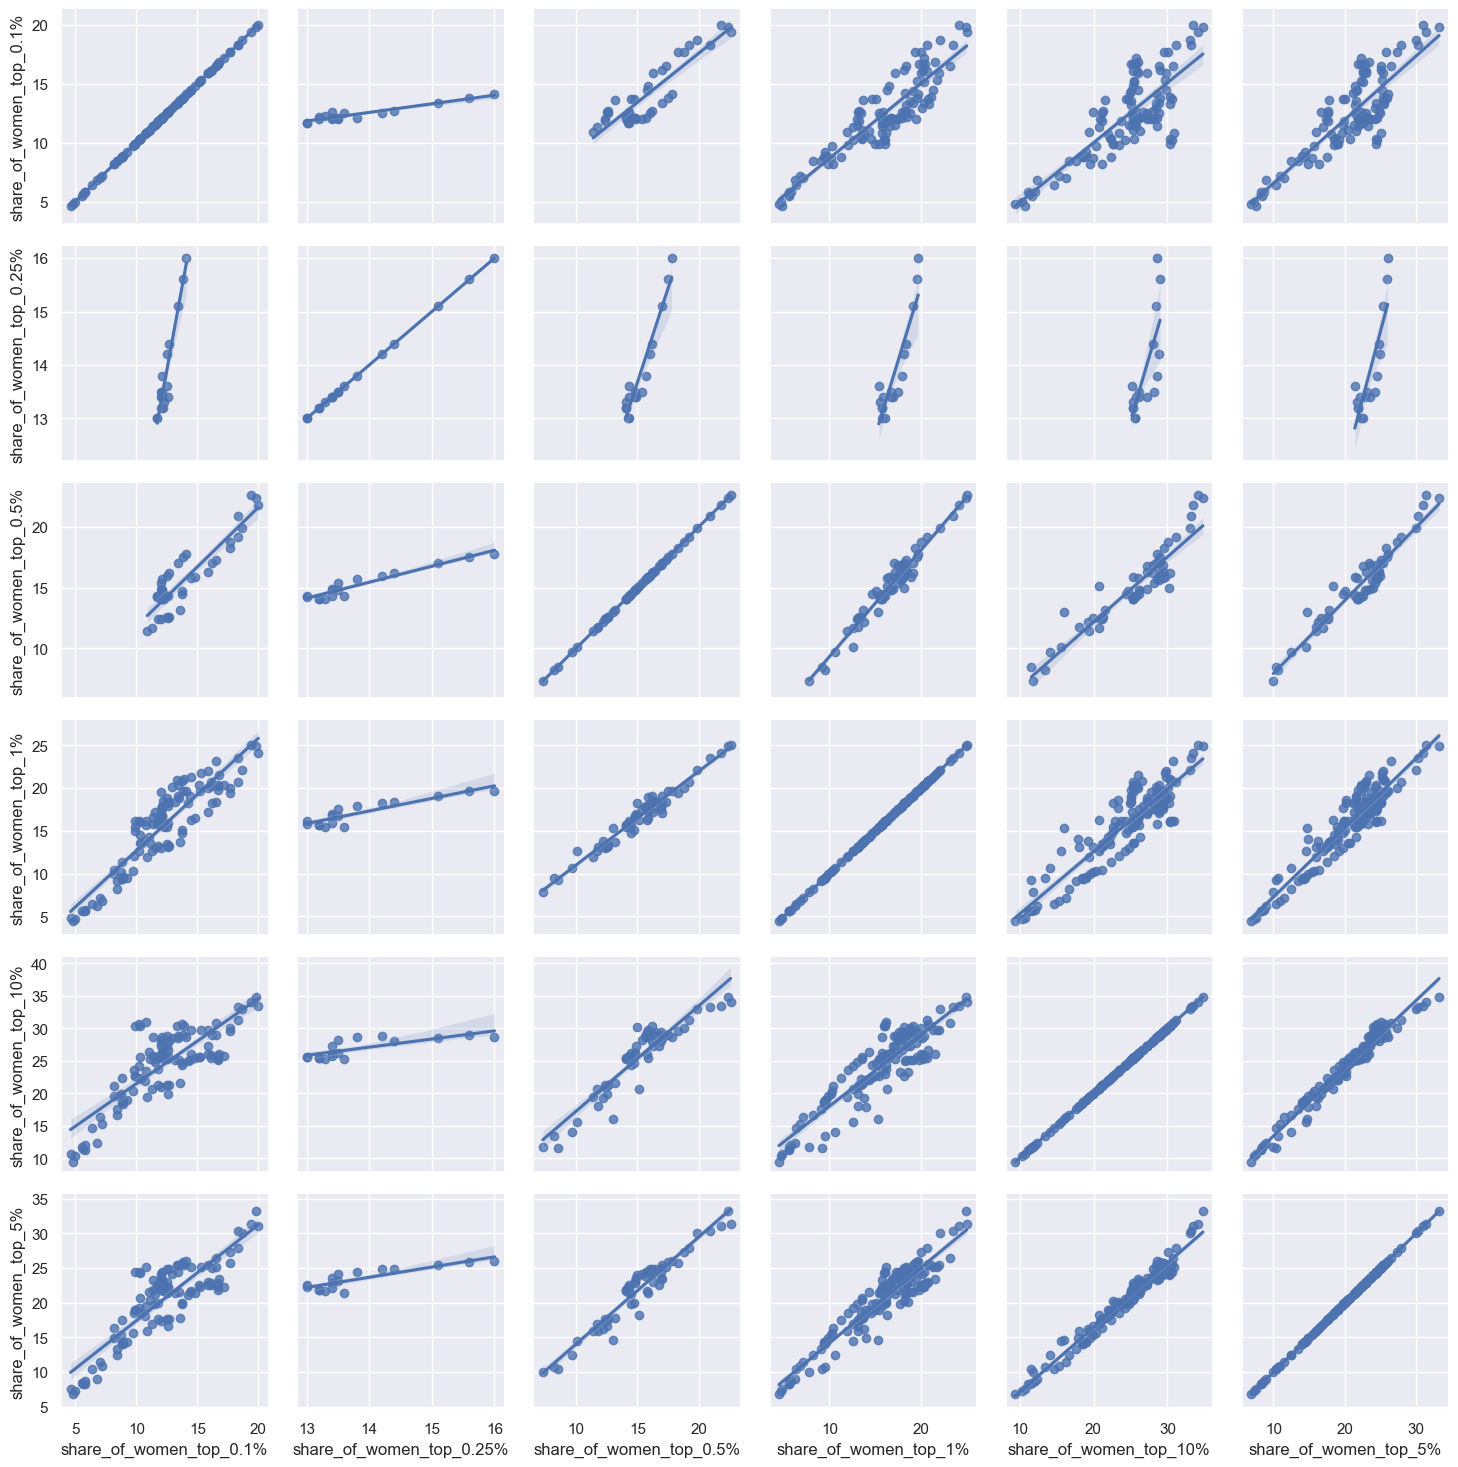

In [20]:
# We can use these data to train regression model and predict values
g = sns.PairGrid(df_income[['share_of_women_top_0.1%',
       'share_of_women_top_0.25%', 'share_of_women_top_0.5%',
       'share_of_women_top_1%', 'share_of_women_top_10%',
       'share_of_women_top_5%']])
g.map(sns.regplot)
plt.show()

In [21]:
# Filling the values with regression model
# Filling null values starting at the least amount of null values
for col in ['share_of_women_top_1%','share_of_women_top_0.1%',
             'share_of_women_top_0.5%','share_of_women_top_0.25%',]:
    if df_income[col].isnull().any():
        print(col)
        # Training the regression model
        regr = predict_income(df_income,col)
        # Using the model predict missing values
        fill_income(df_income,col,regr)

share_of_women_top_1%
MAE = 1.1901044664409572
MSE = 2.216701479934245
RMSE = 1.4888591202441703
Training score:  0.9069570618508576
share_of_women_top_0.1%
MAE = 1.1652045761383993
MSE = 1.968292052086677
RMSE = 1.4029583215786123
Training score:  0.7862756638065749
share_of_women_top_0.5%
MAE = 0.6146679561198714
MSE = 0.6689044527924839
RMSE = 0.8178657914306503
Training score:  0.939406931389802
share_of_women_top_0.25%
MAE = 0.05886218054858183
MSE = 0.006813398314732857
RMSE = 0.08254331175045533
Training score:  0.7728867228422385


In [22]:
is_null(df_income)

Entity                      0
Code                        0
Year                        0
share_of_women_top_0.1%     0
share_of_women_top_0.25%    0
share_of_women_top_0.5%     0
share_of_women_top_1%       0
share_of_women_top_10%      0
share_of_women_top_5%       0
dtype: int64

In [23]:
# Year is between 1980-2015
# For share of women in top percent 0.1, 0.25, 0.5 mostly 10-15% are women
# For share of women in top percent 1, 5, 10  mostly 13-25% are women
# We can see number of women in top income is very low 
df_income.describe()

,Year,share_of_women_top_0.1%,share_of_women_top_0.25%,share_of_women_top_0.5%,share_of_women_top_1%,share_of_women_top_10%,share_of_women_top_5%
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2001.844595,12.308784,13.450000,14.154054,15.733784,24.312162,20.437162
std,9.227077,3.084147,3.282348,3.873851,4.568132,5.603011,5.288613
min,1980.000000,4.600000,5.000000,4.000000,4.500000,9.400000,6.900000
25%,1996.000000,10.625000,12.000000,12.350000,13.200000,21.200000,17.675000
50%,2004.000000,12.500000,13.900000,14.850000,16.300000,25.400000,21.750000
75%,2009.000000,14.000000,15.000000,17.000000,18.800000,28.800000,24.225000
max,2015.000000,20.000000,21.000000,22.600000,25.000000,34.800000,33.200000


<Axes: title={'center': 'Share of Women in Top Box Plot (1980-2015)'}, xlabel='Share of Women (%)'>

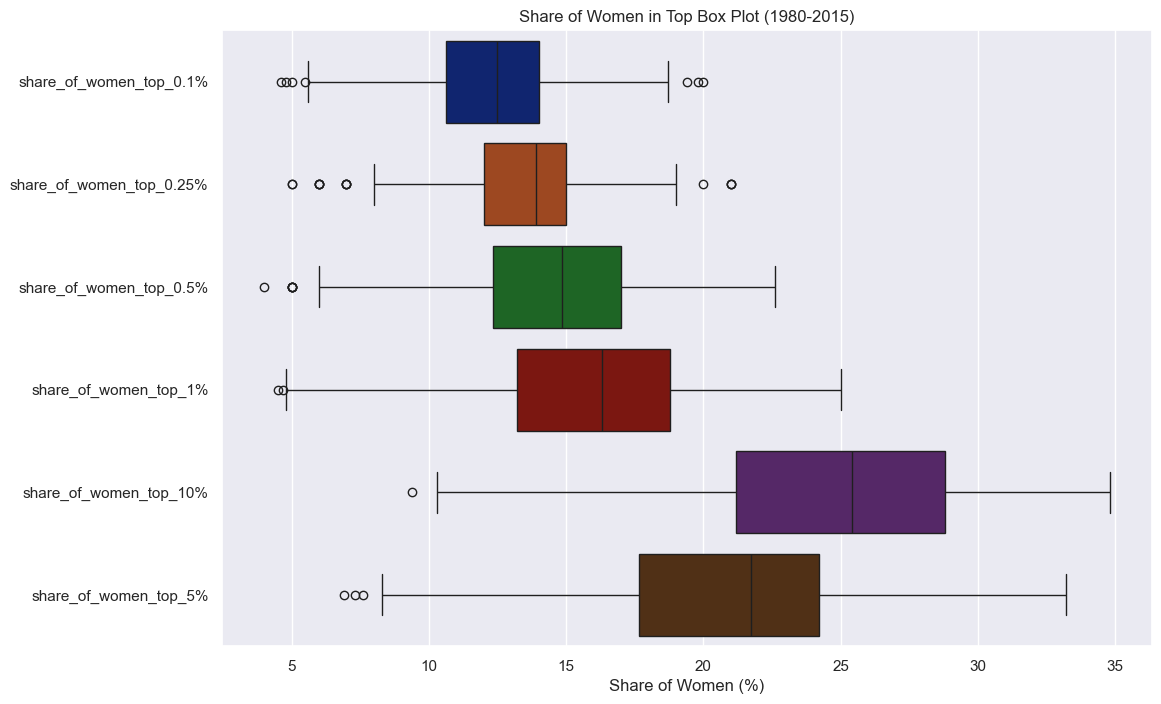

In [24]:
# Mostly women not in top incomes
plt.figure(figsize=(12,8))
plt.title('Share of Women in Top Box Plot (1980-2015)')
plt.xlabel('Share of Women (%)')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_income[get_share_cols(df_income)],orient='h',palette='dark')

### 3. Unpaid care work dataset
- Unpaid care work refers to all unpaid services provided within a household for its members, including care of persons, housework and voluntary community work.
- The ratio is calculated by dividing the average time spent by females by the average time spent by males.
- This ratio provides insights into gender disparities in unpaid care work responsibilities. A ratio greater than 1 indicates that females, on average, spend more time on unpaid care work compared to males


In [25]:
df_unpaid_care_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         52 non-null     object 
 1   Code                           52 non-null     object 
 2   Year                           52 non-null     int64  
 3   f_to_m_unpaid_care_work_ratio  52 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [26]:
df_unpaid_care_work.head()

,Entity,Code,Year,f_to_m_unpaid_care_work_ratio
0,Albania,ALB,2014,7.21
1,Algeria,DZA,2014,6.75
2,Argentina,ARG,2014,2.88
3,Armenia,ARM,2014,5.24
4,Australia,AUS,2014,1.81


In [27]:
# Checking null values
# There is one null value
# It is not important 
is_null(df_unpaid_care_work)

Entity                           0
Code                             0
Year                             0
f_to_m_unpaid_care_work_ratio    0
dtype: int64

In [28]:
get_outliers(df_unpaid_care_work,'f_to_m_unpaid_care_work_ratio')

Series([], Name: f_to_m_unpaid_care_work_ratio, dtype: float64)

In [29]:
# Data only contains information about 2014
# We can see from the ratio women takes more responsibilty for unpaid care work
# We can say mostly woman around the world do 2-3 times more unpaid care work than men
df_unpaid_care_work.describe()

,Year,f_to_m_unpaid_care_work_ratio
count,52.0,52.000000
mean,2014.0,2.757885
std,0.0,1.487806
min,2014.0,1.300000
25%,2014.0,1.770000
50%,2014.0,2.165000
75%,2014.0,3.230000
max,2014.0,7.490000


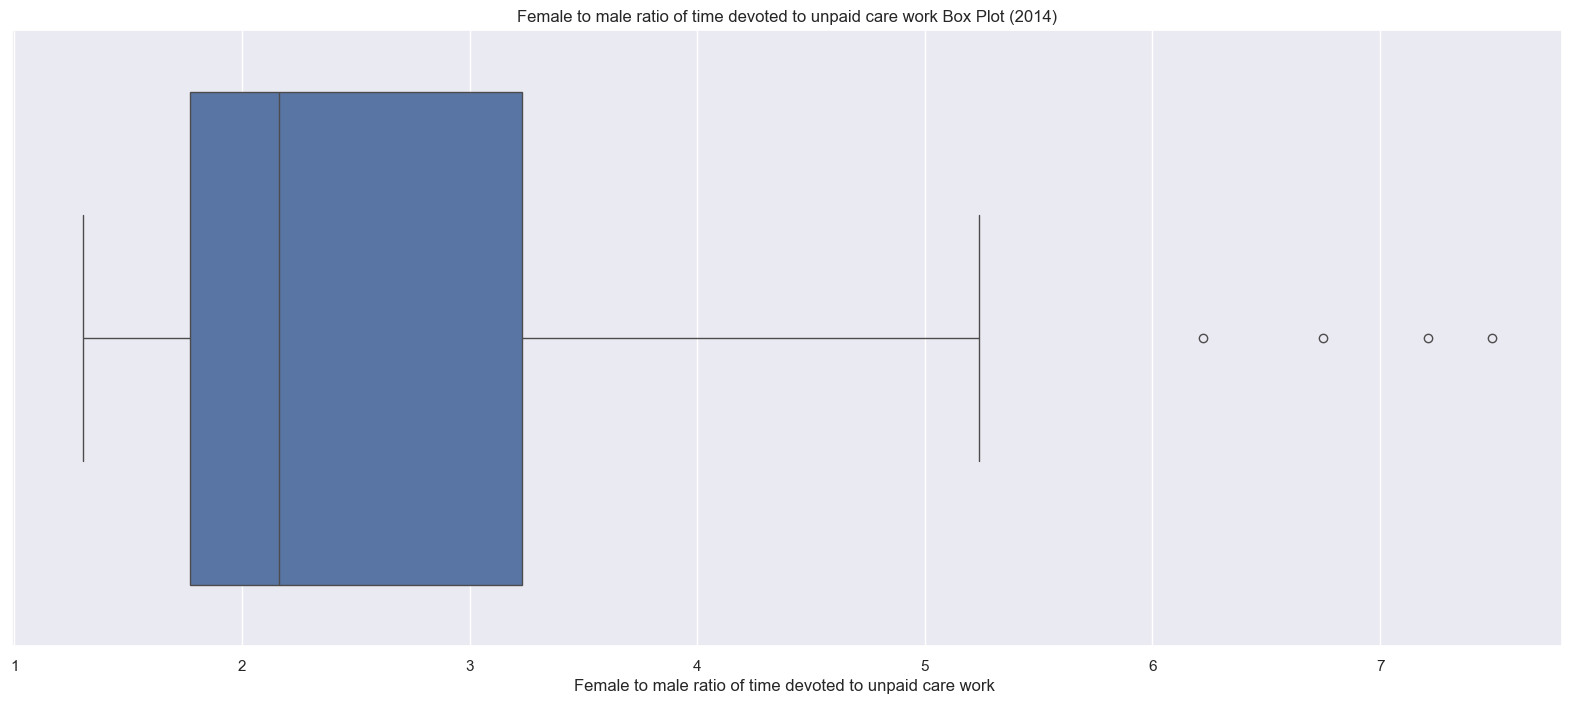

In [30]:
# Mostly ratio is bigger than 1 and lower than 5
# Woman do 2-3 times more unpaid care work 
plt.figure(figsize=(20,8))
plt.title('Female to male ratio of time devoted to unpaid care work Box Plot (2014)')
plt.xlabel('Female to male ratio of time devoted to unpaid care work ')
sns.set_theme(style="darkgrid")
sns.boxplot(df_unpaid_care_work['f_to_m_unpaid_care_work_ratio'],orient='h')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\1068190156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_unpaid_care_work.sort_values(by = ['f_to_m_unpaid_care_work_ratio'],ascending=False), x="Entity", y="f_to_m_unpaid_care_work_ratio",palette='dark')


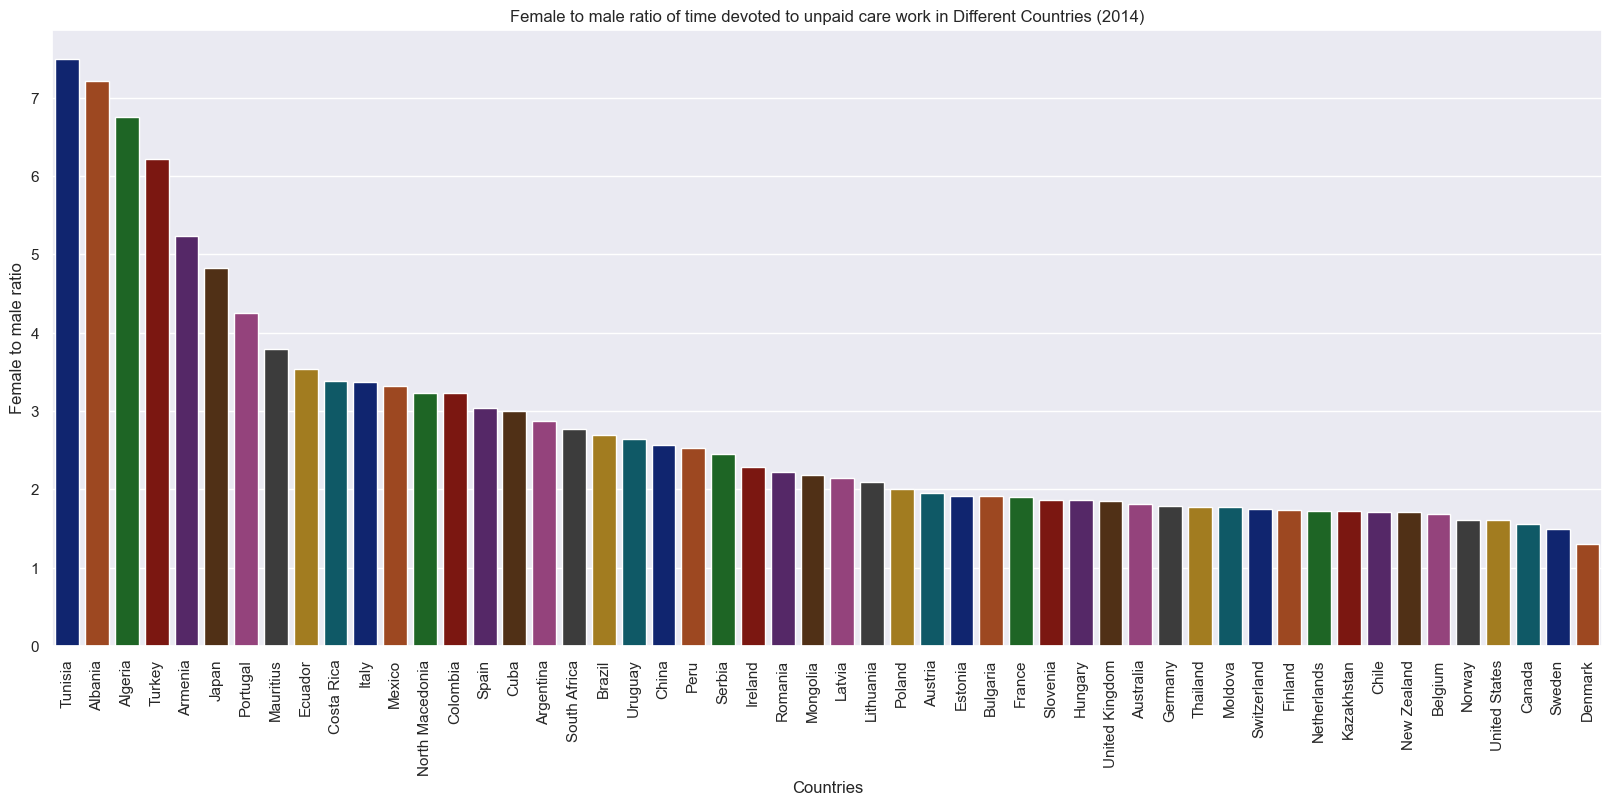

In [31]:
# Most of the countries have about 2-3 ratio
# Women generally spend 2-3 times more hours per day on unpaid care work
# Tunisia, Albania, Algeria has the biggest ratio and Denmark, Sweden, Canada has the smallest ratio
plt.figure(figsize=(20,8))
plt.title('Female to male ratio of time devoted to unpaid care work in Different Countries (2014)')
plt.ylabel('Female to male ratio')
plt.xlabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_unpaid_care_work.sort_values(by = ['f_to_m_unpaid_care_work_ratio'],ascending=False), x="Entity", y="f_to_m_unpaid_care_work_ratio",palette='dark')
plt.show()

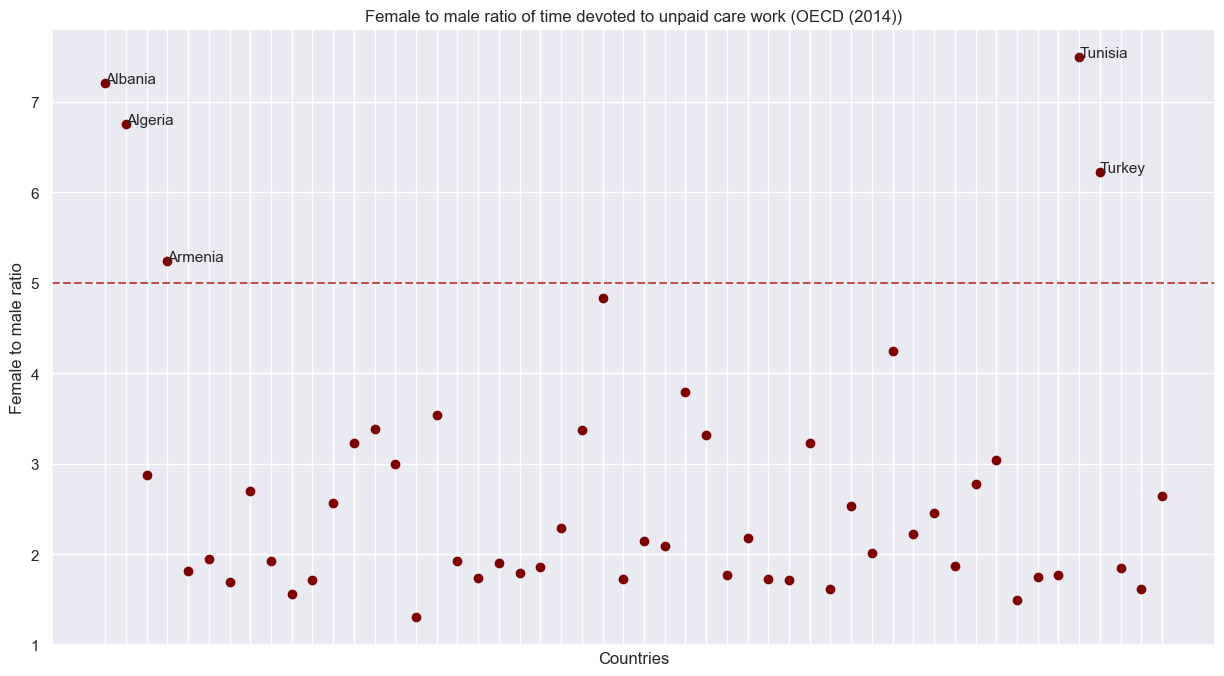

In [32]:
# Tunisia, Albania, Algeria, Turkey, Armenia has the biggest ratio with between 5 to 8 hours a day
plt.figure(figsize=(15,8))
plt.title('Female to male ratio of time devoted to unpaid care work (OECD (2014))')
plt.ylabel('Female to male ratio')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=5, color='r', linestyle='--')
for i in range(len(df_unpaid_care_work)):
    x = df_unpaid_care_work['Entity'][i]
    y = df_unpaid_care_work['f_to_m_unpaid_care_work_ratio'][i]
    plt.plot(x, y, "o", color="maroon")
    if df_unpaid_care_work['f_to_m_unpaid_care_work_ratio'][i] >= 5:
        plt.text(x, y * (1 - 0.00005), df_unpaid_care_work['Entity'][i], fontsize=11)
plt.show()

### 4. Fertility - Labor Force
- The fertility rate, expressed as the number of children per woman, is based on age-specific fertility rates in a given year.

In [33]:
df_fertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          4746 non-null   object 
 1   Code                            4746 non-null   object 
 2   Year                            4746 non-null   int64  
 3   Labor_force_participation_rate  2937 non-null   float64
 4   Fertility_rate                  4746 non-null   float64
 5   Population                      4746 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 222.6+ KB


In [34]:
df_fertility.head()

,Entity,Code,Year,Labor_force_participation_rate,Fertility_rate,Population
0,Albania,ALB,1989,46.76,2.9416,3282187.0
1,Albania,ALB,1990,45.22,2.9003,3295073.0
2,Albania,ALB,1991,44.52,2.8259,3302087.0
3,Albania,ALB,1992,44.18,2.7670,3303738.0
4,Albania,ALB,1993,36.54,2.7071,3300715.0


In [35]:
# Checking null values
# No null values in the important columns
is_null(df_fertility)


Labor_force_participation_rate    1809
Entity                               0
Code                                 0
Year                                 0
Fertility_rate                       0
Population                           0
dtype: int64

In [36]:
# Filling Labor_force_participation_rate in fertilty data with labor_force data
# If the value not exist on labor force dataset fill  with that country's average of labor participation rate in existing years 
fill_fertility(df_fertility)

In [37]:
is_null(df_fertility)

Entity                            0
Code                              0
Year                              0
Labor_force_participation_rate    0
Fertility_rate                    0
Population                        0
dtype: int64

In [38]:
# Checking outliers
# No outliers
get_outliers(df_fertility,'Fertility_rate')

Series([], Name: Fertility_rate, dtype: float64)

In [39]:
# Checking outliers
# No outliers
get_outliers(df_fertility,'Labor_force_participation_rate')

Series([], Name: Labor_force_participation_rate, dtype: float64)

In [40]:
df_fertility.describe()

,Year,Labor_force_participation_rate,Fertility_rate,Population
count,4746.000000,4746.000000,4746.000000,4.746000e+03
mean,2000.500000,46.635211,2.362879,3.308125e+07
std,12.122196,13.593753,1.118572,1.233211e+08
min,1980.000000,2.440000,0.745500,1.227900e+04
25%,1990.000000,38.742500,1.587600,1.353362e+06
50%,2000.500000,48.450000,2.000600,5.212998e+06
75%,2011.000000,55.467500,2.789450,2.170153e+07
max,2021.000000,87.590000,8.124600,1.425894e+09


C:\Users\HP\AppData\Local\Temp\ipykernel_12244\3428138384.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=df_fertility['Fertility_rate'],orient='h',palette='dark')


<Axes: title={'center': 'Fertility Rate in Different Countries Box Plot (1980-2021)'}, xlabel='Fertility Rate'>

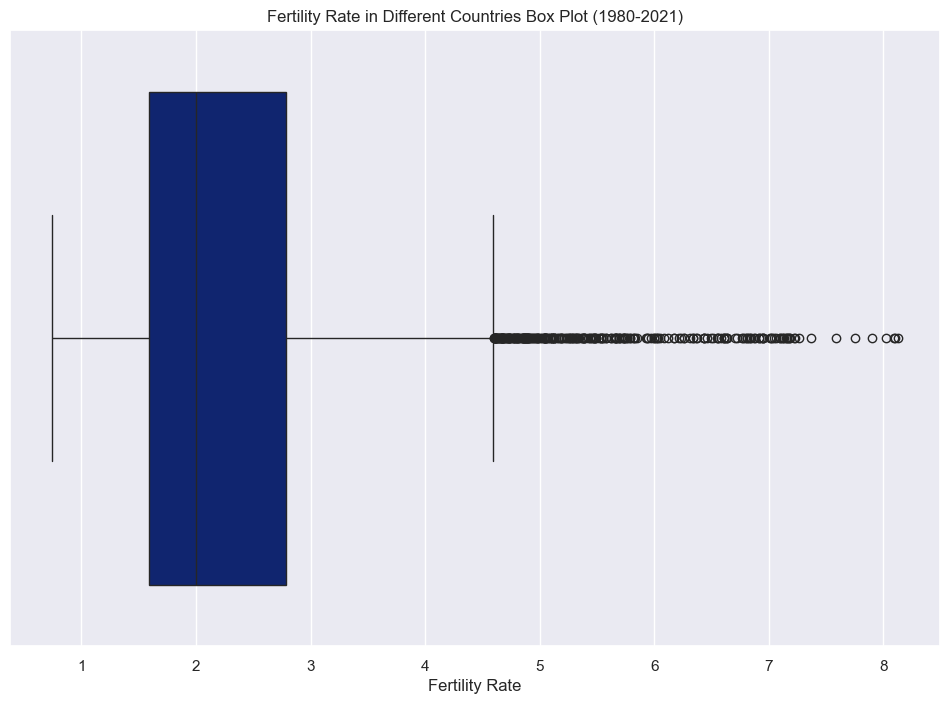

In [41]:
plt.figure(figsize=(12,8))
plt.title('Fertility Rate in Different Countries Box Plot (1980-2021)')
plt.xlabel('Fertility Rate')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_fertility['Fertility_rate'],orient='h',palette='dark')

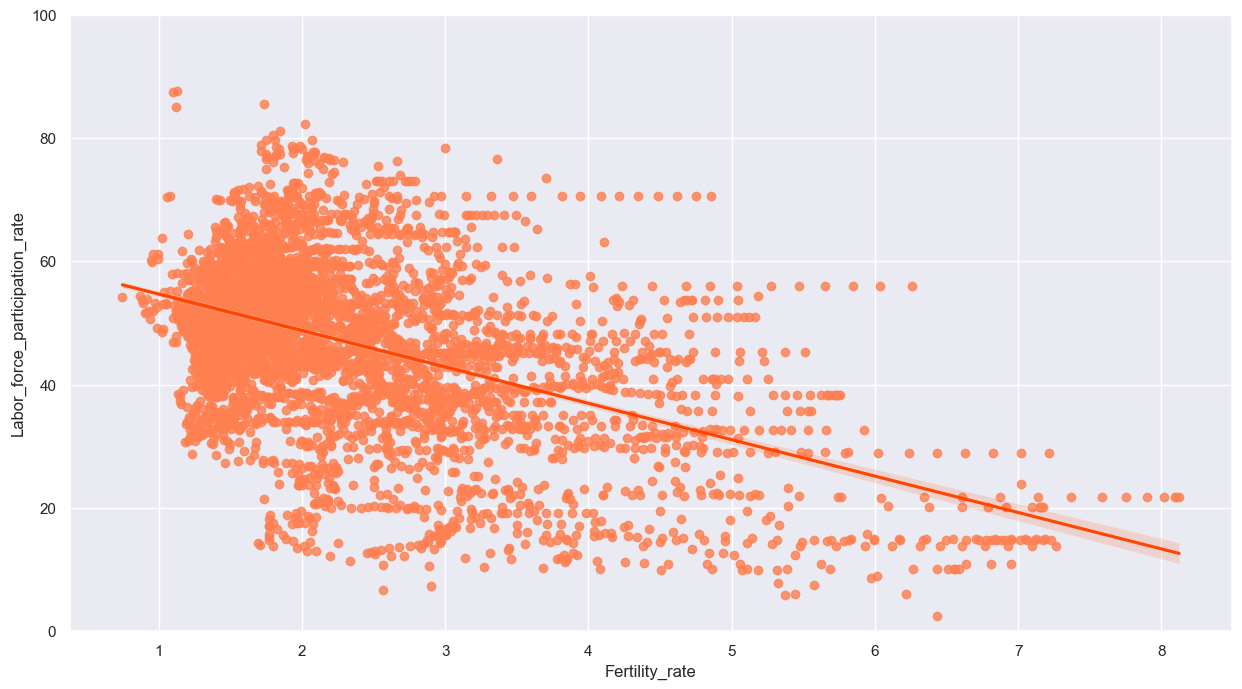

In [42]:
# We can see the negative relation with fertility rate and labor force participation rate
plt.figure(figsize=(15,8))
sns.regplot(data=df_fertility,
                x="Fertility_rate",
                y="Labor_force_participation_rate",
                color='coral',
                line_kws=dict(color="orangered")
            
            
                
                )
plt.ylim(0,100)
plt.show()

[Text(0, 0.5, 'Year'),
 Text(0, 1.5, 'Labor_force_part'),
 Text(0, 2.5, 'Fertility'),
 Text(0, 3.5, 'Population')]

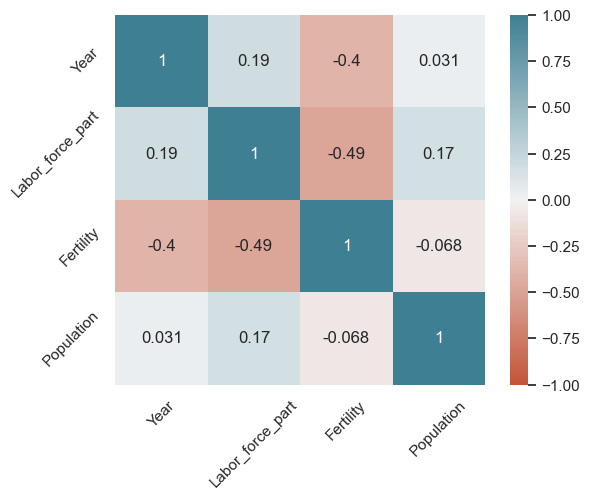

In [43]:
# We can see there is a negative relationship between labor force participation rate and fertility rate
matrix = df_fertility[['Year', 'Labor_force_participation_rate',
       'Fertility_rate', 'Population'
    ]].corr()
matrix
ax = sns.heatmap(matrix, 
            xticklabels=matrix.columns.values,
            yticklabels=matrix.columns.values,
             cmap=sns.diverging_palette(20, 220, n=200),
            vmin=-1,
            vmax=1,
            square=True,
            annot=True
            )
ax.set_xticklabels(['Year', 'Labor_force_part', 'Fertility', 'Population'], rotation=45)
ax.set_yticklabels(['Year', 'Labor_force_part', 'Fertility', 'Population'], rotation=45)

### 5. A Woman Can Get a Job In The Same Way As a Men
- Restrictions on a woman's legal capacity and ability to work considered.
- It provides a measure of whether there are certain jobs that women are not allowed to do. 

In [44]:
df_woman_can_get_same_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Entity                                 4687 non-null   object
 1   Code                                   4687 non-null   object
 2   Year                                   4687 non-null   int64 
 3   a_woman_can_get_a_job_in_the_same_way  4687 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 146.6+ KB


In [45]:
df_woman_can_get_same_jobs.sample(5)

,Entity,Code,Year,a_woman_can_get_a_job_in_the_same_way
3783,Singapore,SGP,2022,1
3380,Romania,ROU,2006,1
323,Azerbaijan,AZE,2002,1
3314,Qatar,QAT,1983,0
1398,France,FRA,2002,1


In [46]:
# 1= Yes ,0= No
# Data is mostly leaning into Yes but there are still no
# Year is between 1980-2022
df_woman_can_get_same_jobs.describe()

,Year,a_woman_can_get_a_job_in_the_same_way
count,4687.000000,4687.000000
mean,2001.000000,0.897376
std,12.410998,0.303500
min,1980.000000,0.000000
25%,1990.000000,1.000000
50%,2001.000000,1.000000
75%,2012.000000,1.000000
max,2022.000000,1.000000


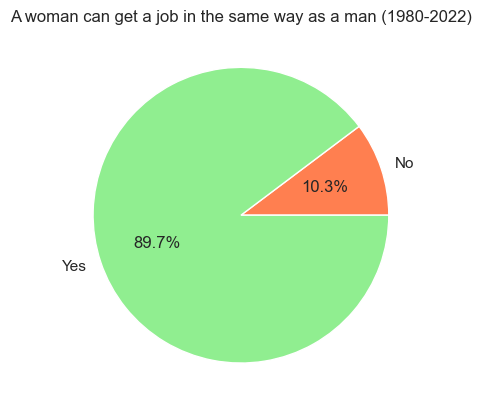

<Figure size 1200x800 with 0 Axes>

In [47]:
# there is still a belief that some jobs are not suitable for women. 
plt.pie(
        x=[
        len(df_woman_can_get_same_jobs.query('a_woman_can_get_a_job_in_the_same_way == 0')),
        len(df_woman_can_get_same_jobs.query('a_woman_can_get_a_job_in_the_same_way == 1')),
        ],
        labels=['No', 'Yes'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen',],
)
plt.title('A woman can get a job in the same way as a man (1980-2022)')
plt.figure(figsize=(12, 8))
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\206093170.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_woman_can_get_same_jobs.query('a_woman_can_get_a_job_in_the_same_way == 0').groupby('Entity',as_index=False).count().sort_values(by = ['a_woman_can_get_a_job_in_the_same_way']),


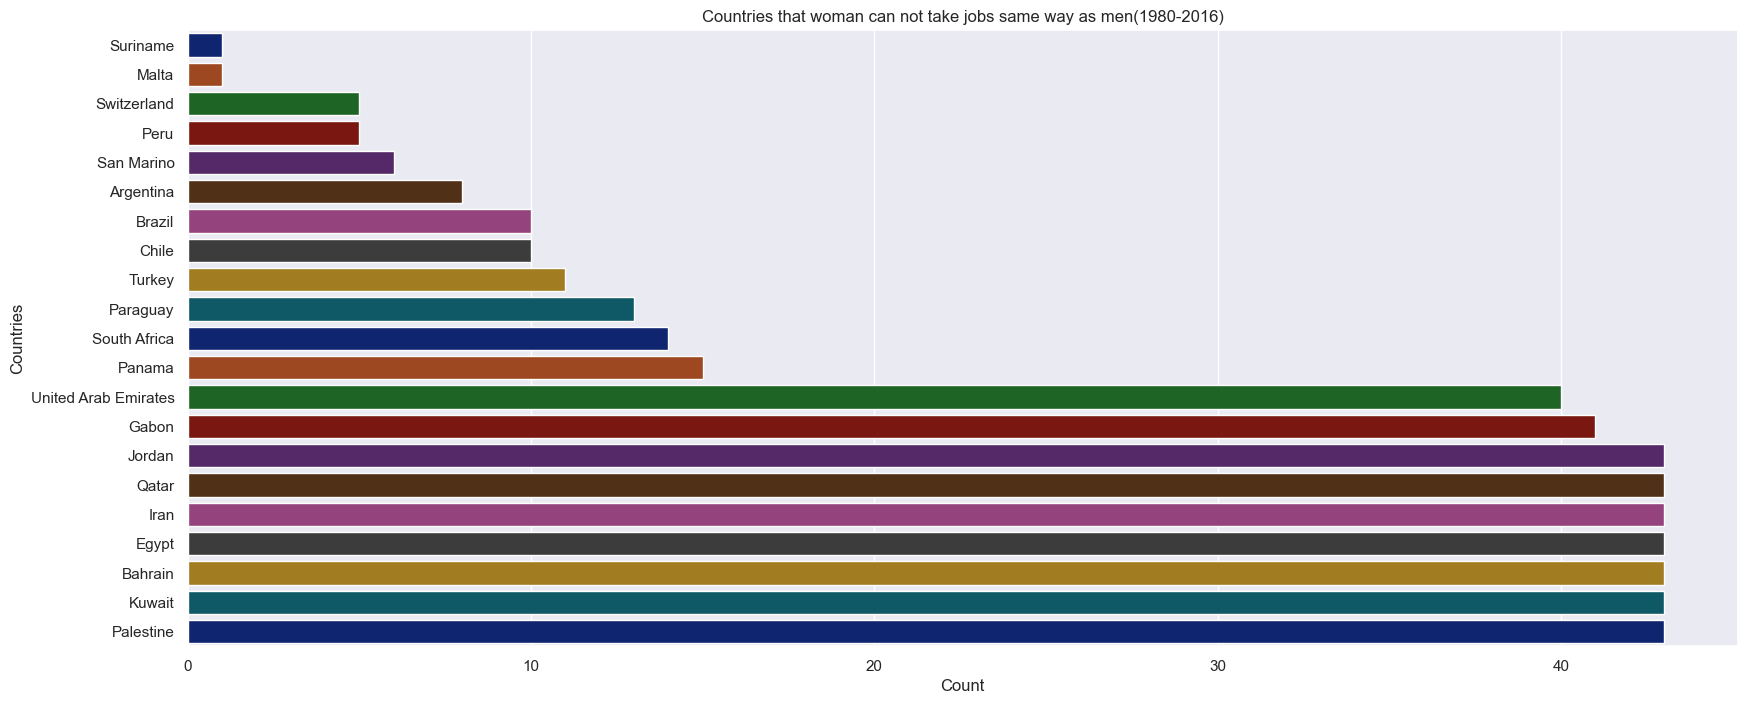

In [48]:
# In Palestine, Kuwait, Bahrain, Egypt, Iran, Qatar, Jordan from 1980 to 2016 women legally cant take some jobs same way as a man
# These countries all in Middle East
# Turkey also one of the countries but we can see that changed in some years
plt.figure(figsize=(20,8))
plt.title('Countries that woman can not take jobs same way as men(1980-2016)')
plt.ylabel('Countries')
plt.xlabel('Count')
sns.barplot(data=df_woman_can_get_same_jobs.query('a_woman_can_get_a_job_in_the_same_way == 0').groupby('Entity',as_index=False).count().sort_values(by = ['a_woman_can_get_a_job_in_the_same_way']),
            y="Entity",
            x="a_woman_can_get_a_job_in_the_same_way",
            palette='dark',
            orient='h'
            
)
plt.show()